In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import json
from PIL import Image
from collections import OrderedDict

In [8]:
colors = {'Brown': 80457,
 'Grey': 97963,
 'Green': 7375,
 'Black': 6007,
 'Blue': 6485,
 'Orange': 2374,
 'Purple': 5686,
 'Yellow': 1722,
 'White': 367,
 'Red': 898,
'Pink':996}

''

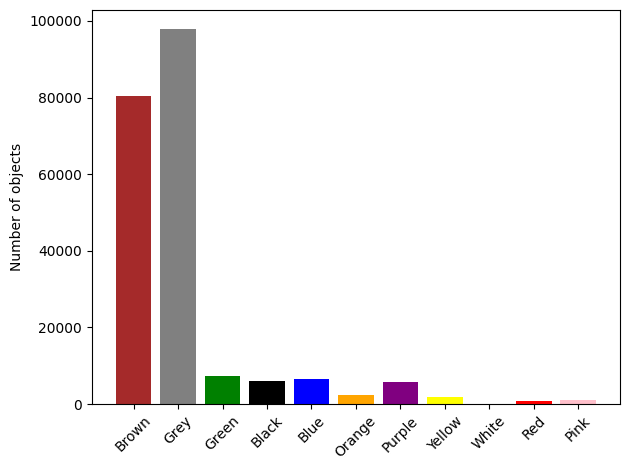

In [71]:
# color the bars
plt.bar(colors.keys(), colors.values(), color=[color.lower() for color in colors.keys()])
plt.ylabel("Number of objects")
plt.xticks(rotation=45)
plt.tight_layout()
""

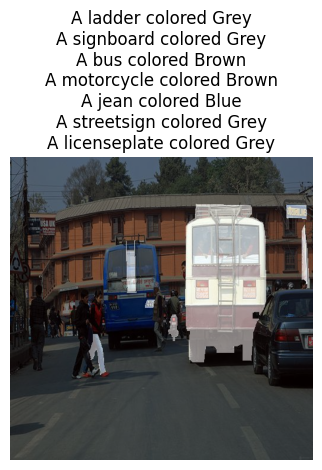

In [57]:
with open("../dataset/data/processed_val.json", "r") as f:
    data = json.load(f)

sample = list(data["images"].keys())[12]
img_name = data["images"][sample]["img_file"]
mask_name = data["images"][sample]["mask_file"]
img = Image.open(f"../dataset/data/processed_val/{img_name}")
mask = Image.open(f"../dataset/data/processed_val/{mask_name}")
img = np.array(img)
mask = np.array(mask)
mask[mask > 0] = 255
plt.imshow(img)
plt.imshow(mask, alpha=0.5, cmap="gray")
annotation = "\n".join([f"{label['basic_sentence']}" for label in data["images"][sample]["labels"]])
plt.title(annotation)
plt.axis("off")
plt.tight_layout()

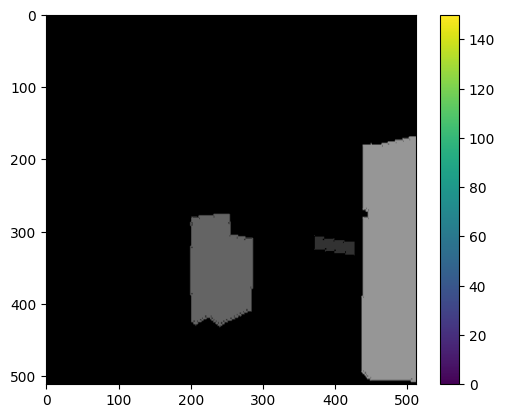

In [37]:
plt.imshow(mask * 50)

In [36]:
avg_mse = OrderedDict()
avg_masked_mse = OrderedDict()
ssim = OrderedDict()
lpips = OrderedDict()

In [37]:
with open("baseline/results_grayscale.txt", "r") as f:
    results = f.readlines()

avg_mse["gray"] = float(results[0].split(":")[-1])
avg_masked_mse["gray"] = float(results[1].split(":")[-1])
ssim["gray"] = float(results[2].split(":")[-1])
lpips["gray"] = float(results[3].split(":")[-1])

# with open("baseline/results_canny.txt", "r") as f:
#     results = f.readlines()
#
# avg_mse["canny"] = float(results[0].split(":")[-1])
# avg_masked_mse["canny"] = float(results[1].split(":")[-1])
# ssim["canny"] = float(results[2].split(":")[-1])
# lpips["canny"] = float(results[3].split(":")[-1])

with open("baseline/results_pix2pix.txt", "r") as f:
    results = f.readlines()

avg_mse["pix2pix"] = float(results[0].split(":")[-1])
avg_masked_mse["pix2pix"] = float(results[1].split(":")[-1])
ssim["pix2pix"] = float(results[2].split(":")[-1])
lpips["pix2pix"] = float(results[3].split(":")[-1])

with open("baseline/results_ledits.txt", "r") as f:
    results = f.readlines()

avg_mse["ledits"] = float(results[0].split(":")[-1])
avg_masked_mse["ledits"] = float(results[1].split(":")[-1])
ssim["ledits"] = float(results[2].split(":")[-1])
lpips["ledits"] = float(results[3].split(":")[-1])

with open("baseline/results_ours.txt", "r") as f:
    results = f.readlines()

avg_mse["ours"] = float(results[0].split(":")[-1])
avg_masked_mse["ours"] = float(results[1].split(":")[-1])
ssim["ours"] = float(results[2].split(":")[-1])
lpips["ours"] = float(results[3].split(":")[-1])

with open("baseline/results_ours-v2.txt", "r") as f:
    results = f.readlines()

avg_mse["ours-v2"] = float(results[0].split(":")[-1])
avg_masked_mse["ours-v2"] = float(results[1].split(":")[-1])
ssim["ours-v2"] = float(results[2].split(":")[-1])
lpips["ours-v2"] = float(results[3].split(":")[-1])

# with open("baseline/results_grayscale_processed.txt", "r") as f:
#     results = f.readlines()
#
# avg_mse["gray_processed"] = float(results[0].split(":")[-1])
# avg_masked_mse["gray_processed"] = float(results[1].split(":")[-1])
# ssim["gray_processed"] = float(results[2].split(":")[-1])
# lpips["gray_processed"] = float(results[3].split(":")[-1])
#
# with open("baseline/results_canny_processed.txt", "r") as f:
#     results = f.readlines()
#
# avg_mse["canny_processed"] = float(results[0].split(":")[-1])
# avg_masked_mse["canny_processed"] = float(results[1].split(":")[-1])
# ssim["canny_processed"] = float(results[2].split(":")[-1])
# lpips["canny_processed"] = float(results[3].split(":")[-1])

In [38]:
# recalculate relative metrics
baseline = avg_mse["gray"]
for key in avg_mse.keys():
    avg_mse[key] = avg_mse[key] / baseline

baseline = avg_masked_mse["gray"]
for key in avg_masked_mse.keys():
    avg_masked_mse[key] = avg_masked_mse[key] / baseline

baseline = ssim["gray"]
for key in ssim.keys():
    ssim[key] = ssim[key] / baseline

baseline = lpips["gray"]
for key in lpips.keys():
    lpips[key] = lpips[key] / baseline

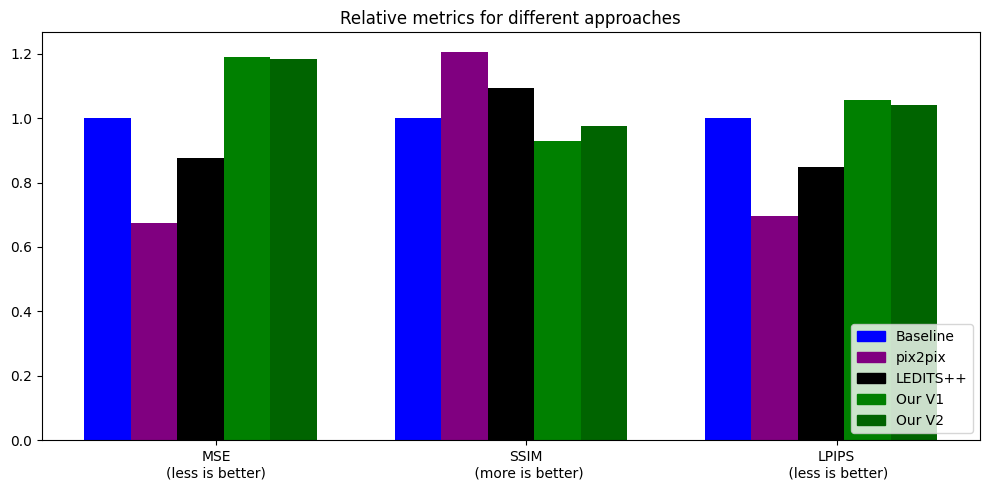

In [39]:
# plot bars with different colors based on approach.
# group bars by metric
# all on the same plot

plt.figure(figsize=(10, 5))
barWidth = 0.15
r1 = np.arange(-0.35, 0.40, 0.15)
r2 = [x + 0 for x in r1]
r3 = [x + 1 for x in r2]
r4 = [x + 1 for x in r3]

colors = ['blue', "purple", "black", "green", "darkgreen"]

plt.bar(r1, avg_mse.values(), color=colors, width=barWidth)
#plt.bar(r2, avg_masked_mse.values(), color=colors, width=barWidth)
plt.bar(r3, ssim.values(), color=colors, width=barWidth)
plt.bar(r4, lpips.values(), color=colors, width=barWidth)

plt.bar(r4, np.zeros(5), color="white", width=barWidth, label="Brightness")
plt.bar(r4, np.zeros(5), color="white", width=barWidth, label="Brightness")
#plt.bar(r4, np.zeros(6), color="white", width=barWidth, label="Brightness")

ticks = ["MSE\n(less is better)",
         "SSIM\n (more is better)",
         "LPIPS\n (less is better)"]
plt.xticks([r for r in range(3)], ticks)

# add legend for colors
labels = ["Baseline", "pix2pix", "LEDITS++", "Our V1", "Our V2"]
legend = plt.legend(labels, loc="lower right")
for i in range(5):
    legend.legend_handles[i].set_color(colors[i])

plt.title("Relative metrics for different approaches")
plt.tight_layout()
plt.savefig("metrics.png", dpi=300)

In [35]:
print(avg_mse)
print(ssim)
print(lpips)

OrderedDict([('gray', 0.02940333884855447), ('pix2pix', 0.019795973917893093), ('ledits', 0.02579366889433004), ('ours', 0.0349621880838337), ('ours-v2', 0.03484054549512252)])
OrderedDict([('gray', 0.5303071151646945), ('pix2pix', 0.6399112461923478), ('ledits', 0.5808043029916007), ('ours', 0.49239771999654713), ('ours-v2', 0.516956769840043)])
OrderedDict([('gray', 0.3665200114283744), ('pix2pix', 0.2555928311084171), ('ledits', 0.3107854690775275), ('ours', 0.38777203406500926), ('ours-v2', 0.3811022904240065)])


Text(0.5, 1.0, 'Running average of the loss of v1')

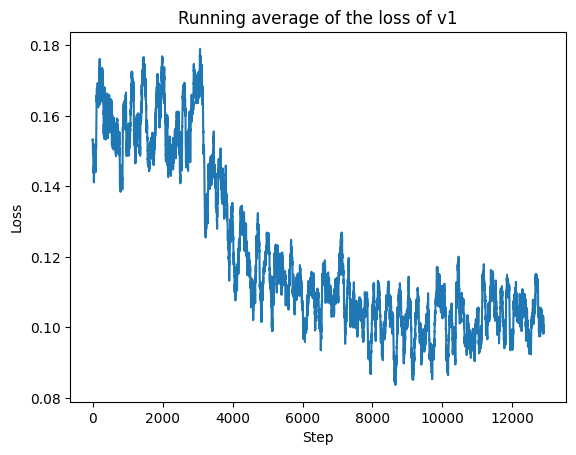

In [4]:
df = pd.read_csv("losses/run_1_1.csv")
data = df[df.columns[1]].to_numpy()

df = pd.read_csv("losses/run_1_2.csv")
data = np.concatenate((data, df[df.columns[1]].to_numpy()))

window = 100
running_average = np.convolve(data, np.ones(window)/window, mode='valid')

plt.plot(running_average)
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Running average of the loss of v1")

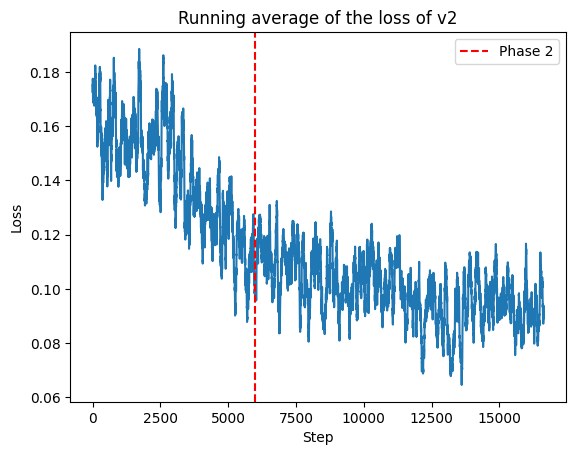

In [36]:
df = pd.read_csv("losses/run_2_1.csv")
data = df[df.columns[1]].to_numpy()

df = pd.read_csv("losses/run_2_2.csv")
data = np.concatenate((data, df[df.columns[1]].to_numpy()))

window = 100
running_average2 = np.convolve(data, np.ones(window)/window, mode='valid')

plt.plot(running_average2)

#vertical line at 6000
plt.axvline(x=6000, color="red", linestyle="--", label="Phase 2")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Running average of the loss of v2")
plt.legend()

Text(0.5, 1.0, 'Running average of the loss of v3')

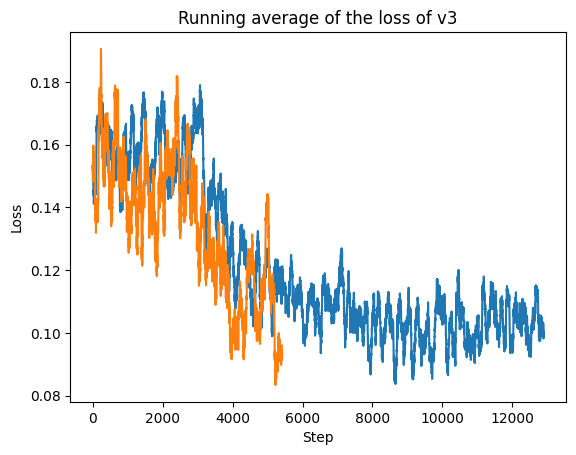

In [5]:
df = pd.read_csv("losses/run_3.csv")

data = df[df.columns[1]].to_numpy()

window = 100
running_average3 = np.convolve(data, np.ones(window)/window, mode='valid')

plt.plot(running_average)
plt.plot(running_average3)

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Running average of the loss of v3")

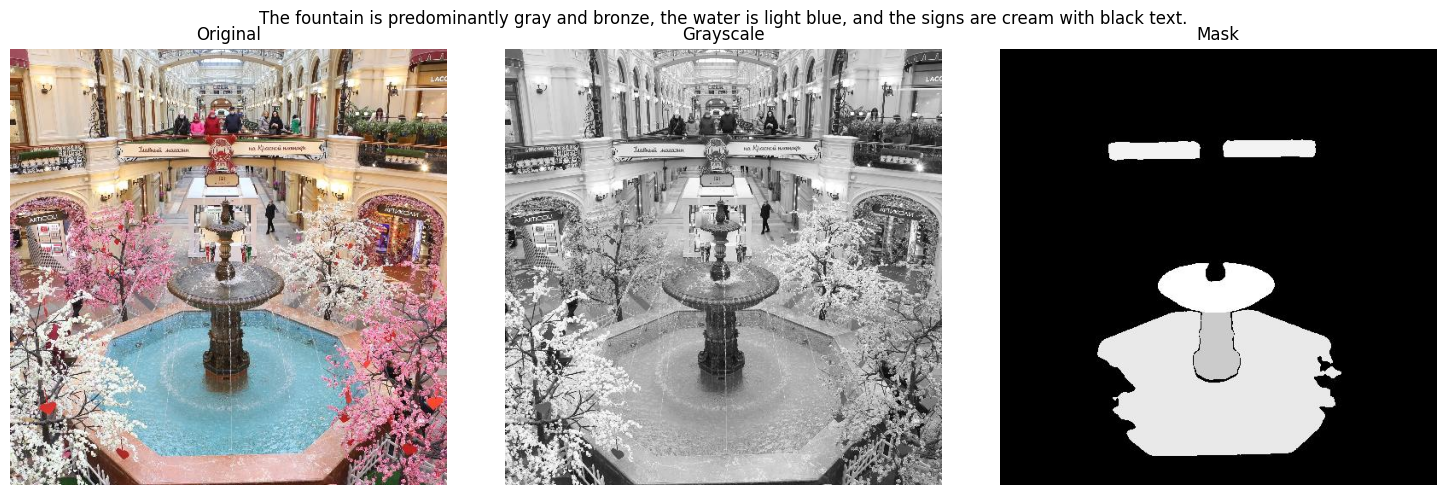

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
original = Image.open("test_split/1.jpg")
gray = Image.open("test_split/1_gray.jpg")
mask = Image.open("test_split/1_mask.jpg")
with open("test_split/1.txt", "r") as f:
    text = f.read()

ax[0].imshow(original)
ax[0].axis("off")
ax[0].set_title("Original")

ax[1].imshow(gray, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Grayscale")

ax[2].imshow(mask, cmap="gray")
ax[2].axis("off")
ax[2].set_title("Mask")

plt.suptitle(text)
plt.tight_layout()
plt.savefig("example.png", dpi=300)

In [53]:
for i in range(1, 50):
    brightness = Image.open(f"plotting/brightness_{i}.jpg")
    ledits = Image.open(f"plotting/ledits_{i}.jpg")
    pix2pix = Image.open(f"plotting/pix2pix_{i}.jpg")
    v1 = Image.open(f"plotting/v1_{i}.jpg")
    with open(f"test_split/{i}.txt", "r") as f:
        text = f.read()

    # add new lines to text to fit in title
    for j in range(100, len(text), 100):
        text = text[:j] + "\n" + text[j:]

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0, 0].imshow(brightness)
    ax[0, 0].axis("off")
    ax[0, 0].set_title("Baseline")

    ax[0, 1].imshow(pix2pix)
    ax[0, 1].axis("off")
    ax[0, 1].set_title("pix2pix")

    ax[1, 0].imshow(ledits)
    ax[1, 0].axis("off")
    ax[1, 0].set_title("LEDITS++")

    ax[1, 1].imshow(v1)
    ax[1, 1].axis("off")
    ax[1, 1].set_title("Ours")

    plt.suptitle(text)
    plt.tight_layout()
    plt.savefig(f"plotting/comparison_{i}.png", dpi=100)
    plt.close()

In [49]:
for i in range(1, 50):
    print("""\\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_<>.png}
\end{figure}""".replace("<>", str(i)))

\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_1.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_2.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_3.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_4.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_5.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_6.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_7.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_8.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_9.png}
\end{figure}
\begin{figure}[htp]
    \centering
    \includegraphics[width=9cm]{comparison_10.png}
\end{figure}
\begin{figure}[htp]